In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pysrc.services.data_service import load_site_data


num_sites = 78

In [2]:
# Load site data
(
    zbar_2017,
    gamma,
    z_2017,
    forestArea_2017_ha,
    theta,
    site_theta_2017_df,
    site_gamma_2017_df,
    municipal_theta_df,
    municipal_gamma_df,
) = load_site_data(num_sites)

Data successfully loaded from /Users/ph2696/Projects/project-amazon/data/hmc


In [3]:
fp = "../output/model_full_model_v3/xi_2.0/pf_2.0/pa_42.03/weight_0.25/sitenum_78/timehzn_200/results.pcl"

with open(fp, "rb") as f:
    # Load the data from the file
    results = pickle.load(f)

fit = results["fit_tracker"][-1].T

In [14]:
fit

,lp__,sigma_sq_theta,alpha_theta[1],alpha_theta[2],alpha_theta[3],alpha_theta[4],alpha_theta[5],alpha_theta[6],alpha_theta[7],alpha_theta[8],...,gamma[69],gamma[70],gamma[71],gamma[72],gamma[73],gamma[74],gamma[75],gamma[76],gamma[77],gamma[78]
Mean,370.737000,0.428090,-0.049400,0.012523,-0.016699,0.016470,-0.026767,0.026286,-0.057499,-0.043003,...,430.890000,439.293000,475.834000,467.066000,415.288000,348.684000,256.502000,332.178000,342.308000,389.569000
MCSE,0.064481,0.000286,0.010677,0.010682,0.010955,0.010338,0.011286,0.011533,0.010183,0.011356,...,0.178399,0.145260,0.141086,0.164387,0.142939,0.114392,0.089330,0.128977,0.120174,0.140887
StdDev,2.715700,0.029629,0.979632,0.992469,1.024190,1.011630,1.010810,1.023520,1.016990,0.972463,...,16.721200,13.281200,14.029800,16.918500,14.857400,11.654300,8.366610,11.949900,11.294000,14.347100
5%,365.752000,0.381788,-1.680150,-1.622240,-1.693250,-1.644610,-1.711800,-1.625980,-1.716020,-1.627500,...,403.807000,417.585000,453.373000,440.123000,391.751000,330.548000,243.027000,312.941000,323.977000,367.087000
50%,371.060000,0.426263,-0.023562,0.001793,-0.012894,0.013985,-0.031244,0.022161,-0.062721,-0.042926,...,430.569000,439.268000,475.554000,466.364000,414.555000,348.410000,256.181000,331.854000,342.015000,389.325000
95%,374.532000,0.478940,1.572050,1.637150,1.683310,1.677620,1.676210,1.725290,1.614550,1.550600,...,458.829000,461.172000,499.571000,495.624000,440.240000,368.423000,270.460000,351.845000,361.272000,413.749000
N_Eff,1773.790000,10731.700000,8418.310000,8631.720000,8739.630000,9576.340000,8021.650000,7875.520000,9973.510000,7333.660000,...,8785.210000,8359.540000,9888.600000,10592.300000,10804.000000,10379.500000,8772.120000,8584.340000,8832.260000,10370.100000
N_Eff/s,93.337900,564.707000,442.976000,454.205000,459.884000,503.912000,422.103000,414.414000,524.811000,385.901000,...,462.282000,439.883000,520.343000,557.371000,568.511000,546.175000,461.594000,451.712000,464.758000,545.680000
R_hat,1.002780,0.999349,0.999141,0.999372,0.999276,0.999315,0.999078,0.999777,0.999435,0.999367,...,0.999310,0.999309,0.999170,0.999165,0.999153,0.999162,0.999218,0.999308,0.999294,0.999195


In [4]:
def agg_Z_trajectory(z_2017, zbar_2017, results: dict, num_sites: int, i) -> None:
    # Get delta_z
    delta_z = results["sol_val_Z_tracker"][i][:, :200]

    # Sum zdot and add it to the z_2017
    z_2017 = z_2017.reshape(num_sites, 1)
    zbar_2017 = zbar_2017
    cum_delta_z = np.cumsum(delta_z, axis=1) + z_2017

    # Load deterministic z solved
    z_det = results["sol_val_Z_tracker"][0][:, :200]
    cumulative_det_z = np.cumsum(z_det, axis=1) + z_2017

    # Add t=0 for hmc solution
    cum_delta_z = np.hstack((z_2017, cum_delta_z))
    cumulative_det_z = np.hstack((z_2017, cumulative_det_z))

    pct_delta_z = np.sum(cum_delta_z, axis=0) / (np.sum(zbar_2017)) * 100
    pct_z_det = np.sum(cumulative_det_z, axis=0) / (np.sum(zbar_2017)) * 100
    time = np.arange(1, 201)

    fig, ax = plt.subplots(1, 1)

    plt.plot(time, pct_z_det[:200], label="deterministic")
    plt.plot(time, pct_delta_z[:200], label=r"adjusted")

    plt.xlabel("Time period")
    plt.ylabel("Z(%)")
    plt.title("Aggregate percentage Z over 200 years")

    # Display the legend
    plt.legend()

In [5]:
results["coe_ensembles"][0].mean(axis=0).shape

(13,)

In [12]:
def traceplot_coe(results) -> None:
    num_sites = results["num_sites"]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    coes = np.array(
        [
            results["coe_ensembles"][i].mean(axis=0)
            for i in results["coe_ensembles"].keys()
        ]
    )
    for j in range(coes.shape[1]):
        plt.plot(
            coes[:, j],
            label=r"$\beta_{%d}$" % (j + 1),
        )
    plt.xlabel("Iteration")
    plt.ylabel(r"$\gamma$")
    plt.title(r"Trace Plot of coefs")
    legend = plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0)
    fig.tight_layout()
    plt.subplots_adjust(right=0.7)

In [7]:
sigmas = [
    x.T[["sigma_sq_theta", "sigma_sq_gamma"]].iloc[0] for x in results["fit_tracker"]
]

In [8]:
def traceplot_sigma(results) -> None:
    num_sites = results["num_sites"]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sigmas = np.array(
        [
            x.T[["sigma_sq_theta", "sigma_sq_gamma"]].iloc[0]
            for x in results["fit_tracker"]
        ]
    )
    for j in range(sigmas.shape[1]):
        plt.plot(
            sigmas[:, j],
            label=r"$\sigma-sq_{%d}$" % (j + 1),
        )
    plt.xlabel("Iteration")
    plt.ylabel(r"$\sigma-sq$")
    plt.title(r"Trace Plot of $\sigma^2$ coefs")
    legend = plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0)
    fig.tight_layout()
    plt.subplots_adjust(right=0.7)

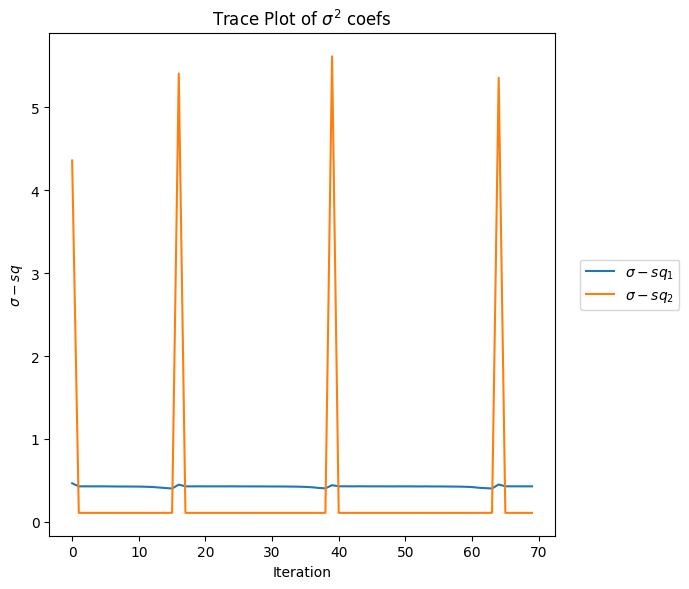

In [9]:
traceplot_sigma(results)

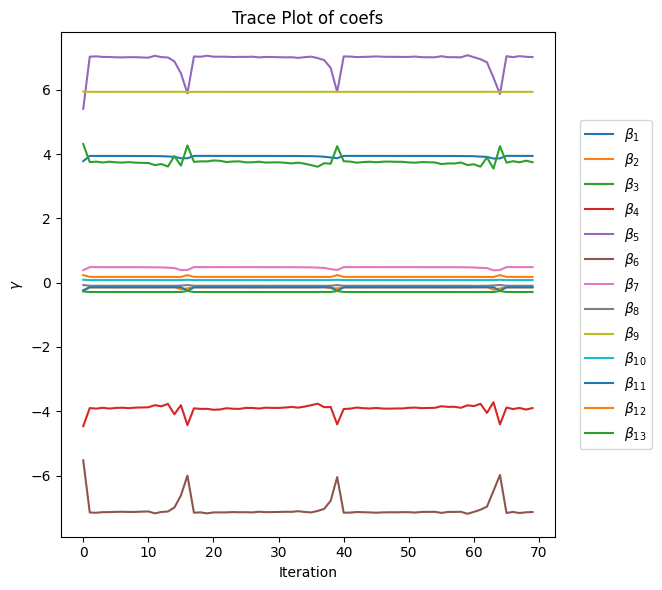

In [13]:
traceplot_coe(results)

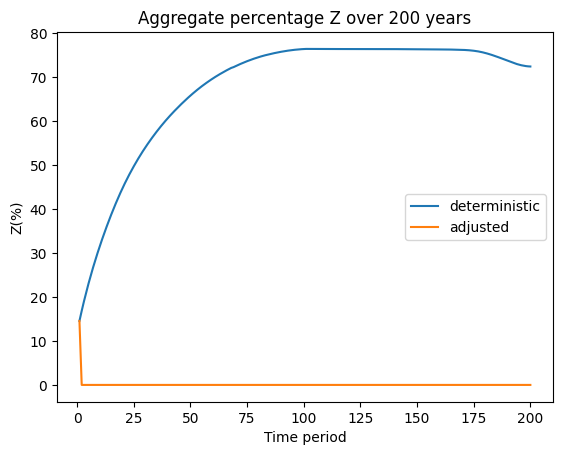

In [11]:
agg_Z_trajectory(z_2017, zbar_2017, results, num_sites, 65)